## __EN2550 - Assignment 02__

##### Name : Kumara B.W.J.C.



##### Index Number : 190328V

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import math
import cv2 as cv
import  circle_fit as cf 

In [2]:
def CircleCenter(c1,c2,c3):
    c = (c1[0]-c2[0])**2 + (c1[1]-c2[1])**2
    a = (c2[0]-c3[0])**2 + (c2[1]-c3[1])**2
    b = (c3[0]-c1[0])**2 + (c3[1]-c1[1])**2
    s = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c) 
    px = (a*(b+c-a)*c1[0] + b*(c+a-b)*c2[0] + c*(a+b-c)*c3[0]) / s
    py = (a*(b+c-a)*c1[1] + b*(c+a-b)*c2[1] + c*(a+b-c)*c3[1]) / s

    ar = np.sqrt(a)
    br = np.sqrt(b)
    cr = np.sqrt(c)
    r = ar*br*cr / np.sqrt((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))

    return r, [px,py]

def CheckPoints(X,radius,center,t):
    inlier_count = 0;
    inliers = []
    outliers = []
    upper_thresh = radius+t
    lower_thresh = radius-t
    for p in X:
        dis = np.abs(np.sqrt((p[0]-center[0])**2+(p[1]-center[1])**2))
        if lower_thresh<=dis<=upper_thresh:
            inliers.append(p)
            inlier_count+=1
        else:
            outliers.append(p)
    return inliers,outliers,inlier_count
            




In [3]:
#RANSAC Algorithm
def RANSAC(X):
    s = 3  # Minimum number of points needed to fit to a circle is 3
    t = 1.96 # to capture 95% of all inliers
    d = 50 
    p = 0.99
    N = int(np.ceil(np.log(1-p)/np.log(1-(1-0.5)**s)))

    max_inliers = 0;

    for i in range(N):
        c1,c2,c3 = X[np.random.randint(0,100)],X[np.random.randint(0,100)],X[np.random.randint(0,100)]
        radius, center = CircleCenter(c1,c2,c3)
        inliers, outliers, inlier_count = CheckPoints(X,radius,center,t)
        if max_inliers<inlier_count:
            max_inliers = inlier_count
            best_sample = np.array([list(c1),list(c2),list(c3)])
            best_inliers = np.array(inliers)
            best_outliers = np.array(outliers)
            best_radius = radius
            best_center = center
            
    fig, ax = plt.subplots(figsize = (12,12),facecolor = "white")
    
    # Circle to fit the best 3 samples
    best_circle = plt.Circle((best_center[0],best_center[1]),best_radius,color = 'blue',fill = False,label = "Best Circle")
    
    # Calculate the best circle to fit all the inliers
    xr,yr ,rr,k = cf.least_squares_circle(best_inliers)
    RANSAC_circle = plt.Circle((xr,yr),rr,color = 'm',fill = False,label = "RANSAC")

    # Plotting inliers, Outliers and the Best 3 samples
    ax.scatter(best_outliers[:,1],best_outliers[:,0], c= 'blue',label = "Outliers")
    ax.scatter(best_inliers[:,1],best_inliers[:,0],c = 'green',label = "Inliers")
    ax.scatter(best_sample[:,1],best_sample[:,0],c = 'red',label = "Best Sample")

    #Plotting two circles
    ax.add_patch(best_circle)
    ax.add_patch(RANSAC_circle)
    ax.legend(loc = "upper right")

    ax.set_title("RANSAC Circle fitting")
    plt.show()


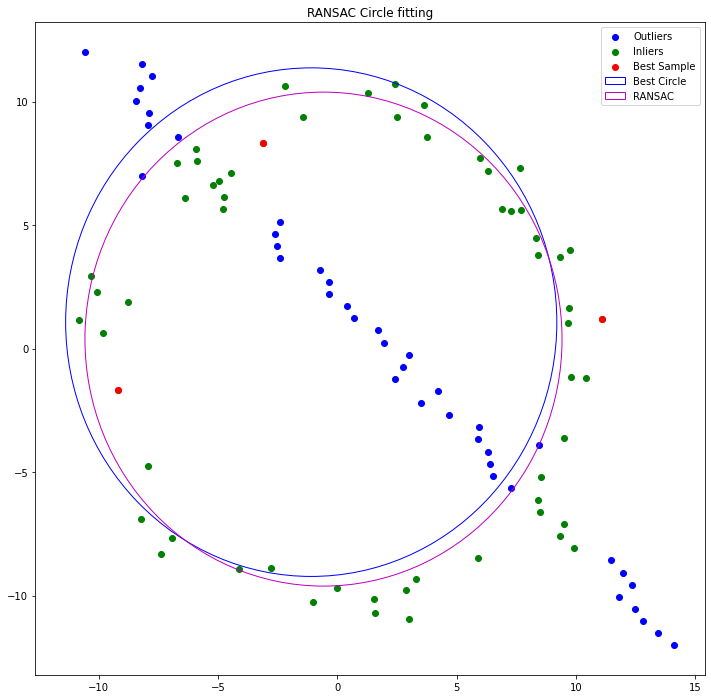

In [4]:


N=100
half_n = N//2
r =10
s =r/16
t =np.random.uniform(0,2*np.pi,half_n)

n = s*np.random.randn(half_n)
x,y = (r+n)*np.cos(t), (r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m,b = -1,2
x = np.linspace(-12,12,half_n)
y =m*x + b +s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X = np.vstack((X_circ,X_line))

RANSAC(X)



In [5]:
def click_event(event, x, y, flags, params):
    global locs
    global points
    global image_copy

    if event == cv.EVENT_LBUTTONDOWN:
        locs.append([x, y])
        points += 1
        image_copy = cv.circle(image_copy, (x,y), 3, (0, 0, 255), -1)
        cv.imshow("Image", image_copy)        
    
    if points == 4:
        cv.destroyAllWindows()
        cv.waitKey(1)
        

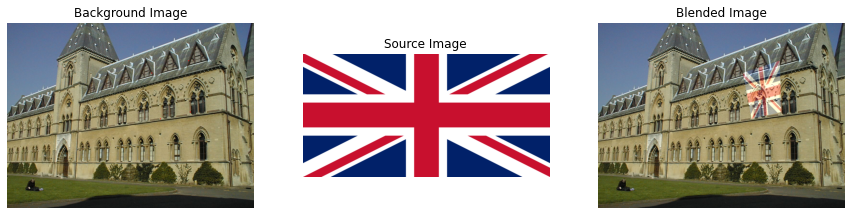

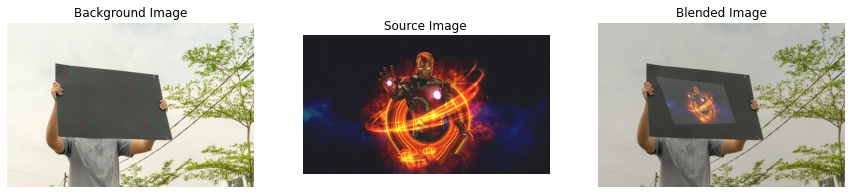

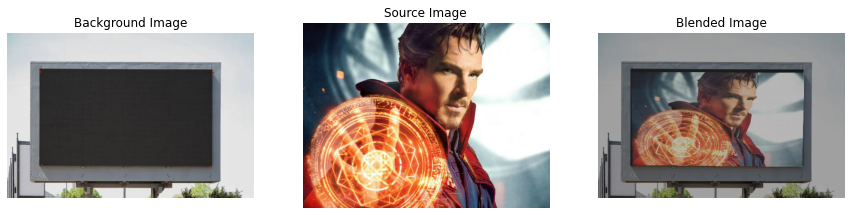

In [6]:
points = []
clicks=0  

# Function to select four points from the destination image
def click_event(event, x, y, flags, params):
    global points
    global clicks
    if clicks == 4:
        return  
    if event == cv.EVENT_LBUTTONDOWN:
        points.append([x,y])
        clicks+=1

        font = cv.FONT_HERSHEY_SIMPLEX
        cv.circle(img,(x,y),2, (0, 0, 255), -1)
        cv.imshow('image', img)
    
#List of source and destination images
source_images = ["Images/uk.png","Images/ironman.jpg","Images/strange.jpg"]
background_images = ['Images/002.jpg',"Images/poster.jpg","Images/bill.jpg"]
coffs = [(1,0.4,0.2),(0.8,0.7,0),(0.7,0.6,0)]

images = []

for i in range(len(source_images)): # Loop for all the images
    if len(images)==i+1:pass
    points = []
    clicks = 0
    # Reading bckground image
    img = cv.imread(background_images[i], 1)

    # displaying the image
    cv.imshow('image', img)

    #getting 
    cv.setMouseCallback('image', click_event)
   
    # wait for a key to be pressed to exit
    cv.waitKey(0)

    # close the window
    cv.destroyAllWindows()

    # Read source image.
    im_src = cv.imread(source_images[i])
    w,h = im_src.shape[1],im_src.shape[0]

    # Four corners of the book in source image
    pts_src = np.array([[0, 0], [w-1, 0], [w-1, h-1],[0, h-1]])

    # Read destination image.
    im_dst = cv.imread(background_images[i])

    # Four corners of the book in destination image.
    pts_dst = np.array(points)

    # Calculate Homography
    h, status = cv.findHomography(pts_src, pts_dst)

    # Warp source image to destination based on homography
    im_out = cv.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))
   
    blended_img = cv.addWeighted(im_dst, coffs[i][0], im_out, coffs[i][1], coffs[i][2])
    images.append([img,im_src,blended_img]) #background,source,blend
    cv.imshow("Blended Image", blended_img)
    cv.waitKey(0)


    cv.destroyAllWindows()
    
    
for im in images:
    fig,ax = plt.subplots(1,3,figsize=(15,10),facecolor = "white")
    titles=['Background Image','Source Image','Blended Image']
    for j in range(3):
        transformed_img_ = cv.cvtColor(im[j],cv.COLOR_BGR2RGB)
        ax[j].axis('off')
        ax[j].imshow(transformed_img_)
        ax[j].set_title(titles[j])

### __Question 03__

(-0.5, 1599.5, 639.5, -0.5)

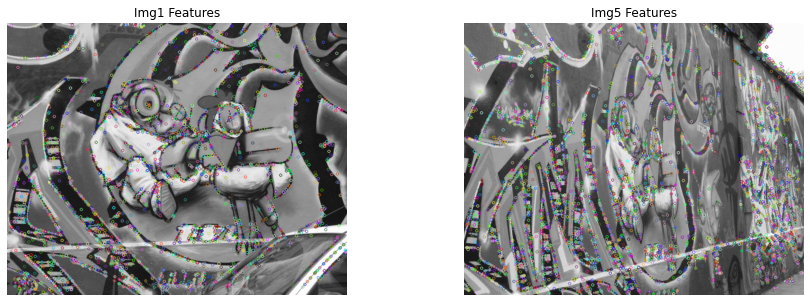

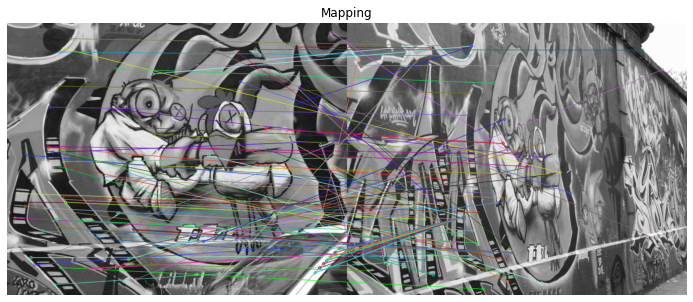

In [17]:
# Reading two images
img1 = cv.imread(r"Images/img1.ppm")
img5 = cv.imread(r"Images/img5.ppm")

#Convert image into Grayscale
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img5_gray = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create(nOctaveLayers = 3,contrastThreshold = 0.09,edgeThreshold = 25,sigma =1)

keypoints_1, descriptors_1 = sift.detectAndCompute(img1_gray, None) 
keypoints_2, descriptors_2 = sift.detectAndCompute(img5_gray, None)  

keypoints_img_1 = np.zeros(img1_gray.shape)
keypoints_img_5 = np.zeros(img5_gray.shape)

keypoints_img_1 = cv.drawKeypoints(img1_gray, keypoints_1, keypoints_img_1)
keypoints_img_5 = cv.drawKeypoints(img5_gray, keypoints_2, keypoints_img_5)

bf = cv.BFMatcher()
matches = bf.knnMatch(descriptors_1,descriptors_2,k=2)

# Apply ratio test
good_matches = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good_matches.append([m])

matches_img = np.zeros(img1_gray.shape)
matches_img_fifty = np.zeros(img1_gray.shape)

matches_img = cv.drawMatchesKnn(img1_gray, keypoints_1, img5_gray, keypoints_2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

good_matches = np.squeeze(np.array(good_matches))

img1_gray = img1_gray.astype(np.float64) / 255
img5_gray = img5_gray.astype(np.float64) / 255

fig, ax = plt.subplots(1, 2, figsize=(15, 5), facecolor = "white")
fig2, ax2 = plt.subplots(1, 1, figsize=(15, 5),facecolor = "white")

ax[0].imshow(keypoints_img_1)
ax[1].imshow(keypoints_img_5)
ax2.imshow(matches_img)

ax[0].set_title("Img1 Features")
ax[1].set_title("Img5 Features")
ax2.set_title("Mapping")

ax[0].axis("off")
ax[1].axis("off")
ax2.axis("off")


In [8]:
def get_homography(X, Y):
    O = np.array([ [0], [0], [0]])

    A = []

    for i in range(4):
        A.append(np.concatenate((O.T, np.expand_dims(X.T[i,:], axis=0), np.expand_dims(-1*Y[1, i]*X.T[i,:], axis=0) ), axis=1))
        A.append(np.concatenate((np.expand_dims(X.T[i,:], axis=0), O.T, np.expand_dims(-1*Y[0, i]*X.T[i,:], axis=0) ), axis=1))

    A = np.array(A).squeeze().astype(np.float64)

    eigen_values, eigen_vectors = np.linalg.eig(A.T @ A)
    H = eigen_vectors[:, np.argmin(eigen_values)]
    H = H.reshape(3, -1)

    return H

def get_inlier_count(X_full, Y_full, H, t, X_inliers, Y_inliers):
    count = 0

    t_X_full = H @ X_full
    t_X_full = t_X_full / t_X_full[2,:]

    error = np.sqrt(np.sum(np.square(t_X_full - Y_full), axis=0))

    inlier_indices = np.where(error <= t)[0]

    X_inliers = np.concatenate((X_inliers, X_full[:,inlier_indices]), axis=1)
    Y_inliers = np.concatenate((Y_inliers, Y_full[:,inlier_indices]), axis=1)

    count = inlier_indices.shape[0]

    return count, X_inliers, Y_inliers

def get_sift_features(img1_path, img2_path):
    img1 = cv.imread(img1_path)
    img5 = cv.imread(img2_path)

    img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    img5_gray = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

    sift = cv.SIFT_create(nOctaveLayers = 3,contrastThreshold = .1,edgeThreshold = 25,sigma =1)

    keypoints_1, descriptors_1 = sift.detectAndCompute(img1_gray, None) 
    keypoints_2, descriptors_2 = sift.detectAndCompute(img5_gray, None)  

    keypoints_img_1 = np.zeros(img1_gray.shape)
    keypoints_img_5 = np.zeros(img5_gray.shape)

    keypoints_img_1 = cv.drawKeypoints(img1_gray, keypoints_1, keypoints_img_1)
    keypoints_img_5 = cv.drawKeypoints(img5_gray, keypoints_2, keypoints_img_5)

    bf = cv.BFMatcher()
    matches = bf.knnMatch(descriptors_1,descriptors_2,k=2)

    # Apply ratio test
    good_matches = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good_matches.append([m])

    matches_img = np.zeros(img1_gray.shape)
    matches_img_fifty = np.zeros(img1_gray.shape)

    matches_img = cv.drawMatchesKnn(img1_gray, keypoints_1, img5_gray, keypoints_2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    good_matches = np.squeeze(np.array(good_matches))

    return good_matches, keypoints_1, keypoints_2
    

def RANSAC(img1_path, img2_path, t, d, N):
    # Parameter for the RANSAC algorithm 
    s = 4

    best_fit_homography = None
    best_inlier_count = 0
    best_fit_X_inliers = None
    best_fit_Y_inliers = None
    count_db = []

    matches, kp1, kp2 = get_sift_features(img1_path, img2_path)

    X_full = np.zeros((len(matches), 3))
    Y_full = np.zeros((len(matches), 3))

    for i, match in enumerate(matches):
        p1 = kp1[match.queryIdx].pt
        p2 = kp2[match.trainIdx].pt

        X_full[i,:] = np.array([p1[0], p1[1], 1])
        Y_full[i,:] = np.array([p2[0], p2[1], 1])
    
    X_full = X_full.T
    Y_full = Y_full.T

    for _ in range(N):
        x = []

        for i in range(s):
            hold_idx = np.random.randint(0, len(matches))
            
            if len(x) == 0:
                x.append(hold_idx)
            elif hold_idx == x[-1]:                
                while hold_idx == x[-1]:
                    hold_idx = np.random.randint(0, len(matches))
                
                x.append(hold_idx)
            else:
                x.append(hold_idx)
        
        X = np.zeros((4,3))
        Y = np.zeros((4,3))

        for i, idx in enumerate(x):
            match = matches[idx]

            p1 = kp1[match.queryIdx].pt
            p2 = kp2[match.trainIdx].pt

            X[i,:] = np.array([p1[0], p1[1], 1])
            Y[i,:] = np.array([p2[0], p2[1], 1])

        X = X.T
        Y = Y.T

        X_inliers = np.zeros((3, 1))
        Y_inliers = np.zeros((3, 1))
    
        H = get_homography(X, Y)        

        count, X_inliers, Y_inliers = get_inlier_count(X_full, Y_full, H, t, X_inliers, Y_inliers)

        X_inliers = np.delete(X_inliers, 0, axis=1)
        Y_inliers = np.delete(Y_inliers, 0, axis=1)

        count_db.append(count)

        if count > best_inlier_count:
            best_fit_homography = H
            best_inlier_count = count
            best_fit_X_inliers = X_inliers
            best_fit_Y_inliers = Y_inliers
    
    return best_fit_homography, best_inlier_count, count_db, best_fit_X_inliers, best_fit_Y_inliers

Text(0.5, 1.0, 'Final Stitched Image')

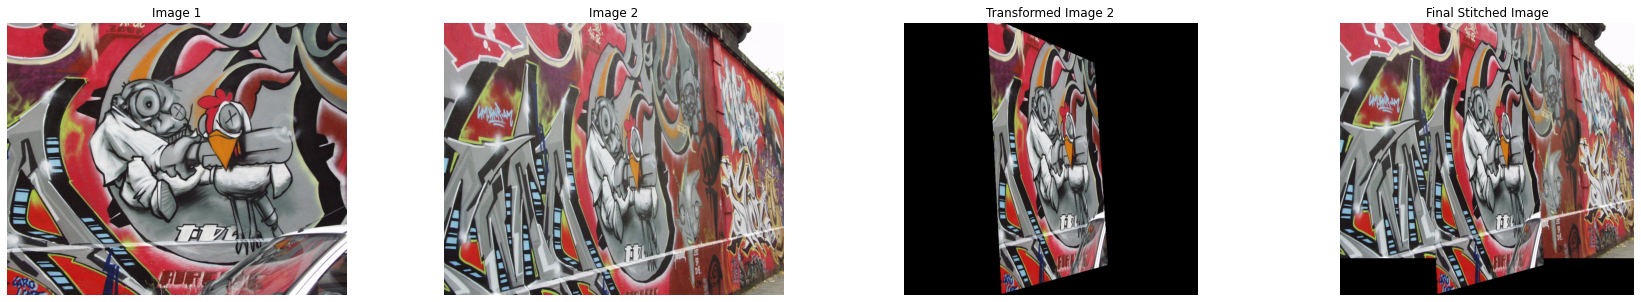

In [12]:
with open("Images/H1to5p", "r") as txt_file:
    actual_H = txt_file.read()
    actual_H = actual_H.split('\n')
    actual_H.pop()

    for i in range(len(actual_H)):
        actual_H[i] = list(map(float, actual_H[i].strip().split()))
    
    actual_H = np.array(actual_H)

path = r"Images/"
H_db = []

for i in range(1, 5):
    img1_path = path + "img" + str(i) + ".ppm"
    img2_path = path + "img" + str(i+1) + ".ppm"

    H, count, count_db, best_fit_X_inliers, best_fit_Y_inliers = RANSAC(img1_path, img2_path, 1, 20, 10000)

    H_db.append(H)

H1to5 = H_db[0]

for i in range(1, len(H_db)):
    H1to5 = H_db[i] @ H1to5

final_img = cv.imread("Images/img1.ppm")
final_img = cv.warpPerspective(final_img, H1to5, dsize=(img1.shape[1], img1.shape[0]+100))

t_img_1 = np.copy(final_img)

for i in range(final_img.shape[0]):
    for j in range(final_img.shape[1]):
        if np.all(final_img[i,j] == 0) and i < img5.shape[0] and j < img5.shape[1]:
            final_img[i,j] = img5[i,j]


fig, ax = plt.subplots(1, 4, figsize=(30, 5),facecolor = "white")

ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(t_img_1, cv.COLOR_BGR2RGB))
ax[3].imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB))

ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")
ax[3].axis("off")

ax[0].set_title("Image 1")
ax[1].set_title("Image 2")
ax[2].set_title("Transformed Image 2")
ax[3].set_title("Final Stitched Image")

(-0.5, 799.5, 739.5, -0.5)

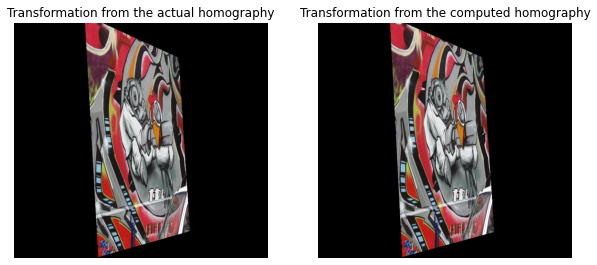

In [14]:
actual_transformed_img = cv.warpPerspective(img1, actual_H, dsize=(img1.shape[1], img1.shape[0]+100))

fig, ax = plt.subplots(1, 2, figsize=(10, 5),facecolor = "white")

ax[0].imshow(cv.cvtColor(actual_transformed_img, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(t_img_1, cv.COLOR_BGR2RGB))

ax[0].set_title("Transformation from the actual homography")
ax[1].set_title("Transformation from the computed homography")

ax[0].axis('off')
ax[1].axis('off')

(-0.5, 799.5, 739.5, -0.5)

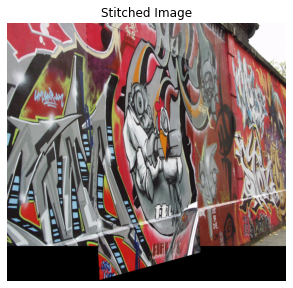

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(5,5),facecolor = "white")
ax.imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB))
ax.set_title("Stitched Image")
ax.axis('off')